In [ ]:
import os
import h5py
import numpy as np
from constants import valid_data_types
from utils import igfcc
from scikits.audiolab import wavwrite, play
from sklearn import manifold
from sklearn.metrics import euclidean_distances

%pylab inline

In [19]:
with h5py.File('../segmented.h5', 'r') as segments:
    for seg in segments:
        grp = segments[seg]
        print(grp['gfccs'])
        break


<HDF5 dataset "gfccs": shape (8192,), type "<i8">


## Retrieve GFCC (gammatone-frequency cepstral coefficients)

In [ ]:
def get_gfccs(i=4):
    with h5py.File('../tracks.h5', 'r') as tracks:
        keys = list(tracks.keys())
        track = keys[i]
        grp = tracks[track]
        gfccs = grp['gfccs'].value
    return gfccs
#         gfccs = grp['gfccs'].value[:,1:] # remove DC component
#         shapes = {dtype: grp[dtype].value.shape for dtype in valid_data_types}
#         print(shapes)


In [ ]:
gfccs = get_gfccs(4)

In [ ]:
gfccs = gfccs.astype(np.float64)
dists = euclidean_distances(gfccs)
mds = manifold.MDS(2, dissimilarity='precomputed', n_init=1, max_iter=100, verbose=1)
scaled = mds.fit(dists)
trans_data = scaled.embedding_
plt.hexbin(trans_data[:, 0], trans_data[:, 1], gridsize=500)

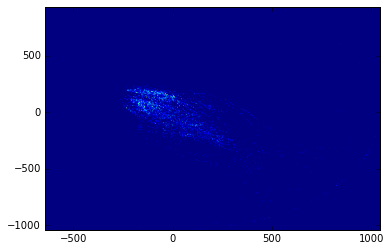

In [17]:
plt.hexbin(trans_data[:, 0], trans_data[:, 1], gridsize=500)

## Play audio

In [ ]:
y = igfcc(gfccs, has_power=True)
y = y.astype(np.float64)
play(y)
